# Sparse Plane Array

疎な平配

In [19]:
Format[splarr[ruleLi_]] := 
  With[
    {
      minPos = Min[#, 0] & /@ Min /@ Transpose[First /@ ruleLi], 
      maxPos = Max[#, 0] & /@ Max /@ Transpose[First /@ ruleLi]
    },
    With[{
      tbl = PadRight[
        Normal[
          SparseArray[(1 - minPos + #[[1]]) -> #[[2]] & /@ ruleLi]
        ], maxPos + 1 - minPos
      ]}, 
      Grid[
        Transpose[
          ReplacePart[tbl, 
            1 - minPos -> Item[
              Extract[tbl, 1 - minPos], Frame -> True
            ]
          ]
        ]
      ]
    ]
  ]

In [20]:
convApply[f_, li1_, li2_] := 
 Join @@ Function[x, Function[y, f[x, y]] /@ li2] /@ li1

listConv1[f_, li_, val_] := f[#, val] & /@ li

listConv2[f_, li1_, li2_] := listConv1[f, li1, #] & /@ li2

convApply[f_, sa1_splarr, sa2_splarr] := 
 splarr[Join @@ listConv2[f, First[sa1], First[sa2]]]
convApply[f_, saSeq__splarr] := 
 convApply[f, First[{saSeq}], convApply[f, Sequence @@ Most[{saSeq}]]]

combApply[f_, sa__splarr] := 
 splarr[Normal[
   f @@ (Last /@ #) & /@ 
      GroupBy[#, First] &@(Join @@ (First /@ {sa}))]]

Unprotect[Plus];
Plus[sa__splarr] := combApply[Plus, sa]
Protect[Plus];

Unprotect[Times];
Times[sa__splarr] := 
 convApply[(#1[[1]] + #2[[1]]) -> (#1[[2]] #2[[2]]) &, sa]
Protect[Times];

Item[0, Frame -> True]   0   0   0

0                        3   0   0

0                        0   0   0

0                        7   0   5

0                        0   0   0

0                        0   0   0

0                        0   0   0

0                        0   0   1
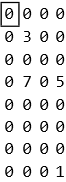

In [32]:
splarr[{
    {1, 1} -> 3,
    {1, 3} -> 7
}] + splarr[{
    {3, 7} -> 1,
    {3, 3} -> 5
}]

b c   0   Item[a c, Frame -> True]   0   0

0     0   0                          0   0

0     0   b d                        0   a d
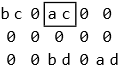

In [33]:
splarr[{
    {1, 1} -> a,
    {-1, 1} -> b
}] splarr[{
    {-1, -1} -> c,
    {1, 1} -> d
}]